In [7]:
import os
import glob

import torch

import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

import config
import dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
# print(image_files)

# "../../..\\abcde.png" -> "abced"
targets_orig = [x.split("\\")[-1][:-4] for x in image_files]

# "abcde" -> [a, b, c, d, e ]
targets = [[c for c in x] for x in targets_orig]

target_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(target_flat)

targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1

# print(targets_enc)
train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)


In [9]:
data_ = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_targets
)
# print(data_.__len__())
# print(data_.__getitem__(1))

In [10]:
train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs, 
    targets=train_targets, 
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH)
)
train_dataset

In [15]:
npimg = train_dataset[0]['images'].numpy()
npimg.shape

0


(3, 75, 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


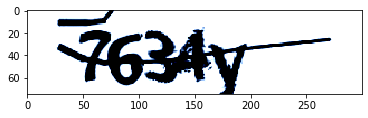

In [19]:
plt.imshow(np.transpose(npimg, (1, 2, 0)))